In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [7]:
df = pd.read_csv('fulldata.csv')

In [21]:
df.head()

,Station,Day(Local_Date),WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(C),TWet(C),...,Tgmin(C),ET05(C),ET10(C),ET20(C),ET30(C),ET100(C),Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2)
0,41351,20200101:0000,317,1.8,224,8.2,270,0.0,18.8,16.6,...,9.3,-,19.7,19.6,-,19.1,1018.6,1016.7,6.9,19.03
1,41351,20200102:0000,226,3.5,196,11.8,324,0.0,17.8,15.6,...,13.3,-,19.2,19.6,-,19.1,1014.6,1012.7,9.4,21.61
2,41351,20200103:0000,266,4.5,216,12.4,432,0.0,20.5,18.3,...,12.6,-,20.3,19.8,-,19.1,1008.0,1006.1,9.3,20.18
3,41351,20200104:0000,222,6.5,215,15.4,462,0.0,17.8,13.2,...,13.8,-,18.4,19.2,-,19.2,1008.7,1006.8,7.2,18.62
4,41351,20200105:0000,246,3.8,298,11.8,394,3.2,18.0,13.7,...,11.2,-,18.4,18.5,-,19.2,1012.5,1010.6,4.3,10.36


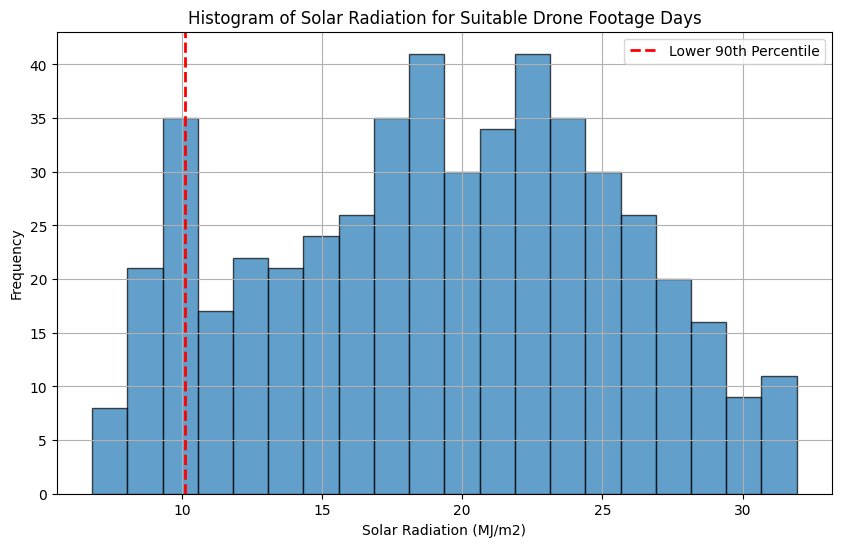

In [27]:
# Filter data for no rain, sufficient sunlight, and low wind speed
filtered_df = df[(df['Rain(mm)'] == 0) & (df['Sun(Hrs)'] > 6) & (df['WSpd(m/s)'] < 7)]

# Calculate the lower 90th percentile of solar radiation
lower_percentile = filtered_df['Rad(MJ/m2)'].quantile(0.1)

# Plot histogram of solar radiation
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(filtered_df['Rad(MJ/m2)'], bins=20, edgecolor='black', alpha=0.7)  # Adjust alpha for semi-transparency

# Plot the vertical bar at the lower 90th percentile
plt.axvline(x=lower_percentile, color='r', linestyle='dashed', linewidth=2, label='Lower 90th Percentile')

plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Frequency')
plt.title('Histogram of Solar Radiation for Suitable Drone Footage Days')
plt.grid(True)
plt.legend()  # Add legend for the vertical bar
plt.savefig('radhist.png')
plt.show()


In [ ]:
def can_I_fly(weather):
    """ This function checks a weather observation and returns if it is okay to fly a DJI Mavic 2 drone or not 
    """
    canifly = True
    if weather
    if weather['Sun(Hrs)'] < 5: canifly = False
    if weather['Rad(MJ/m2'] < 10.5: canifly = False
    if not weather['Rain(mm)'] == 0: canifly = False
    if weather['WSpd(m/s)'] > 7: canifly = False # Determined from DJI website for the Mavic 2